In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

In [35]:
from eval import *
import pandas as pd
import numpy as np

In [3]:
def get_data(path_real, path_fake, real_sep=';', fake_sep=',', drop_columns=None):
    real = pd.read_csv(path_real, sep=real_sep, low_memory=False)
    fake = pd.read_csv(path_fake, sep=fake_sep, low_memory=False)
    shared_min = min(len(fake), len(real))
    real = real.sample(shared_min)
    fake = fake.sample(shared_min)
    if set(fake.columns.tolist()).issubset(set(real.columns.tolist())):
        real = real[fake.columns]
    elif drop_columns is not None:
        real = real.drop(drop_columns, axis=1)
        try:
            fake = fake.drop(drop_columns, axis=1)
        except:
            print(f'Some of {drop_columns} were not found on real.index.')
        assert len(fake.columns.tolist()) == len(real.columns.tolist()), f'Real and fake do not have same nr of columns: {len(fake.columns)} and {len(real.columns)}'
        fake.columns = real.columns
    else:
        fake.columns = real.columns
        
    for col in fake.columns:
        fake[col] = fake[col].astype(real[col].dtype)
    return real, fake

# Creditcard

## Original TGAN

In [14]:
real, fake = get_data('../data/creditcard/creditcard_num.csv', '../final_data/creditcard/creditcard_sample_tgan.csv', real_sep=',')
tgan_org_evaluator = DataEvaluator(real, fake)

In [55]:
tgan_org_evaluator.evaluate(target_col='Amount', target_type='regr', verbose=False)


Correlation metric: kendalltau

Results:
Number of duplicate rows is ignored for total score.
                                                 Result
basic statistics                                 0.7165
Correlation column correlations                 -0.0423
Mean Correlation between fake and real columns   0.9247
Mean correlation classifier F1                   0.6429
Correlation 5 PCA components                     1.0000
Duplicate data between sets                    314.0000
Total Result                                     0.6484


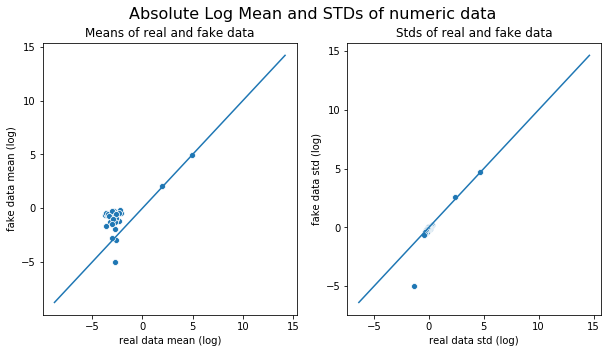

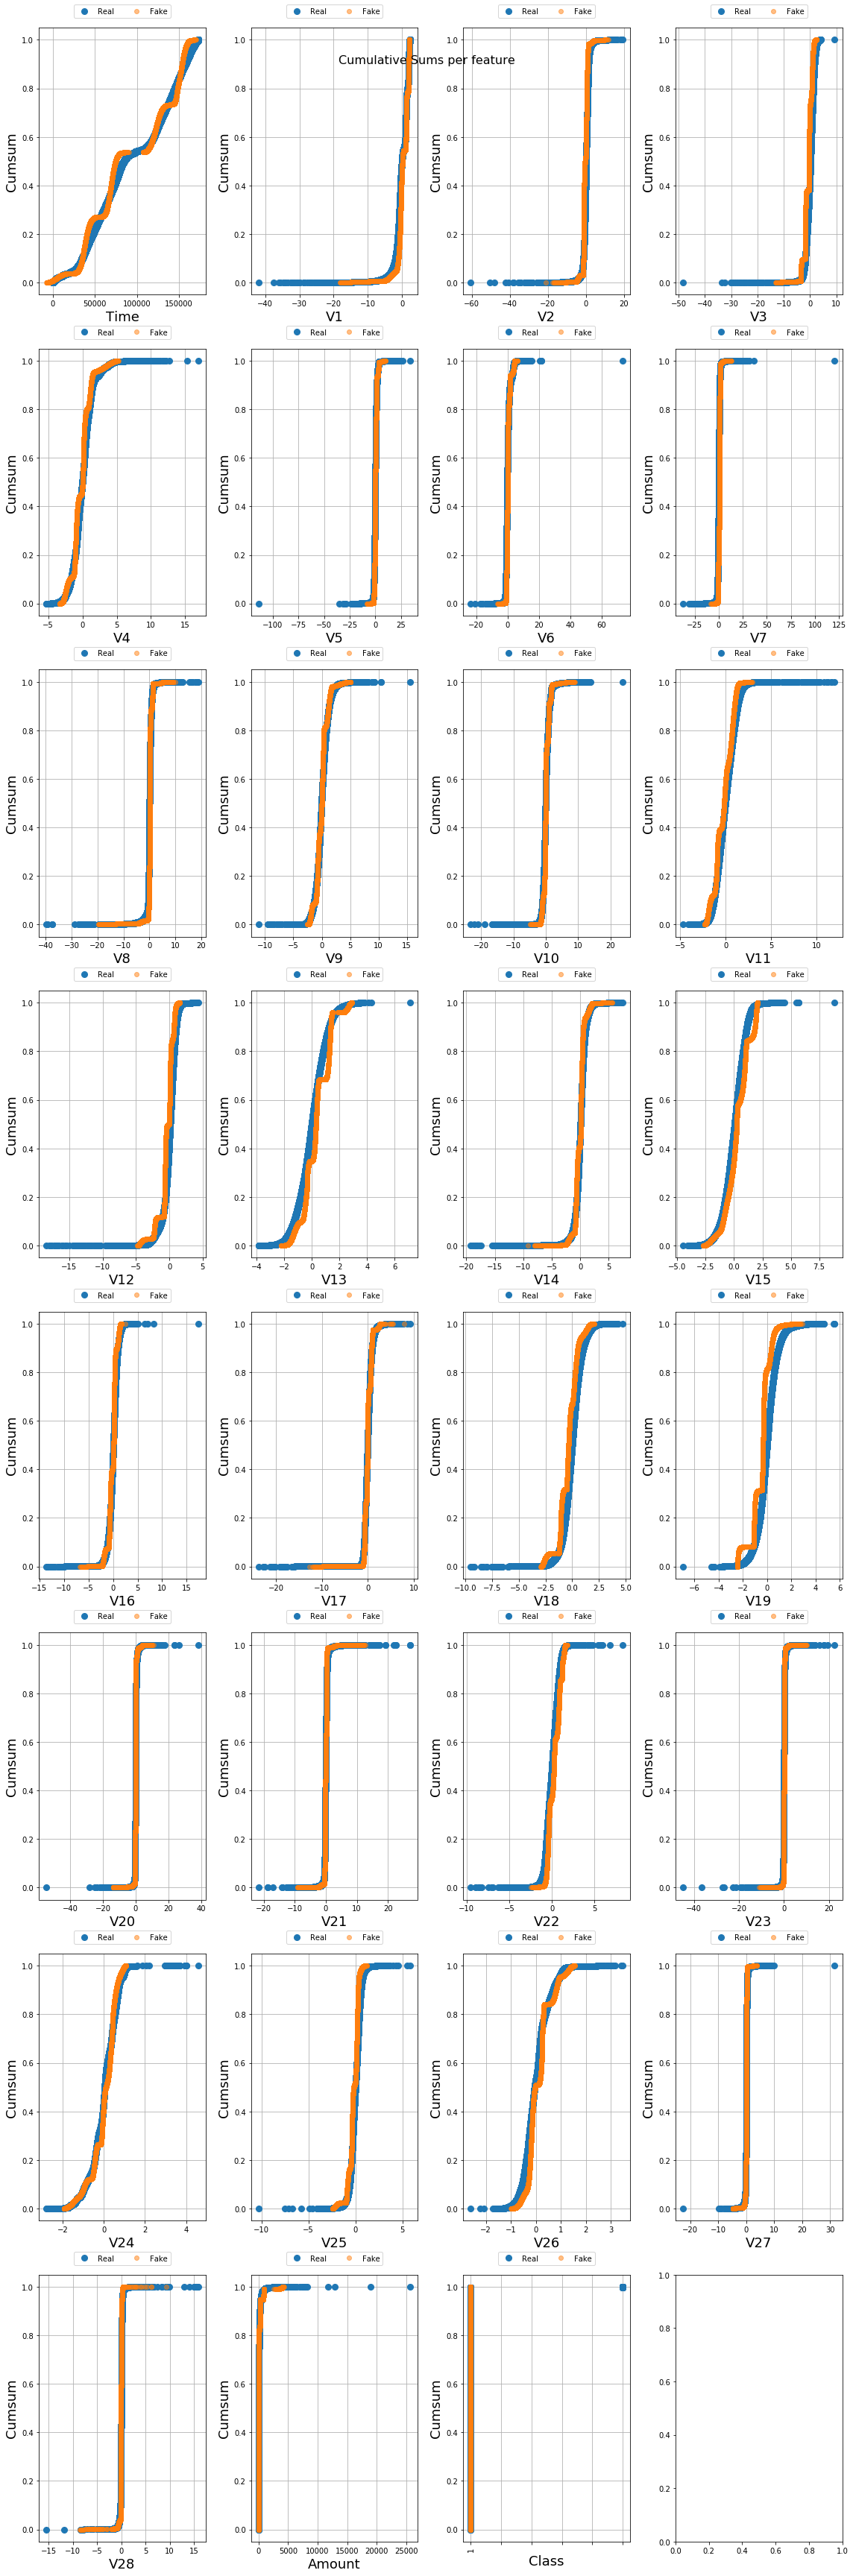

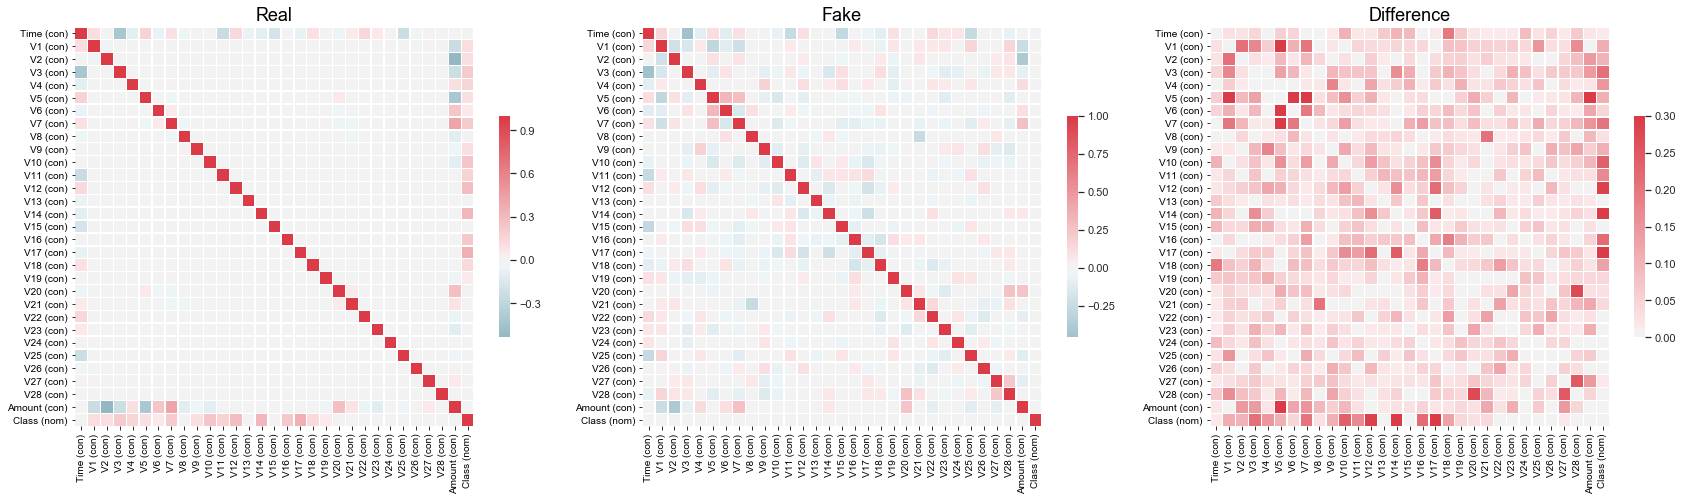

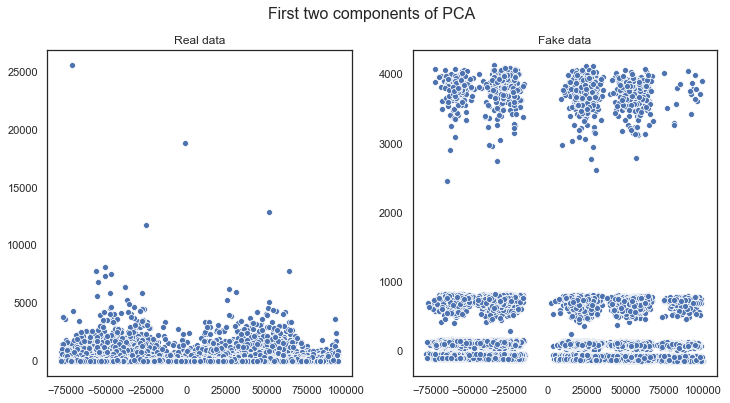

In [54]:
tgan_org_evaluator.visual_evaluation(annot=False)

## WGAN-GP Fixed

In [60]:
real, fake = get_data('../data/creditcard/creditcard_num.csv', '../final_data/creditcard/creditcard_sample_tgan-wgan-gp.csv', real_sep=',')
wgan_evaluator = DataEvaluator(real, fake)

In [62]:
wgan_evaluator.evaluate(target_col='Amount', target_type='regr', verbose=False)


Correlation metric: kendalltau

Results:
Number of duplicate rows is ignored for total score.
                                                 Result
basic statistics                                 0.8106
Correlation column correlations                  0.0726
Mean Correlation between fake and real columns   0.9606
Mean correlation classifier F1                   0.6429
Correlation 5 PCA components                     1.0000
Duplicate data between sets                    321.0000
Total Result                                     0.6973


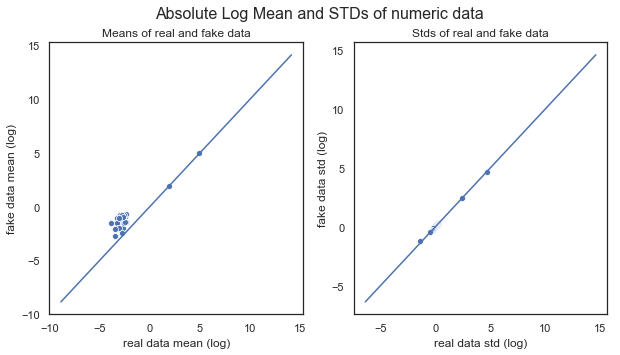

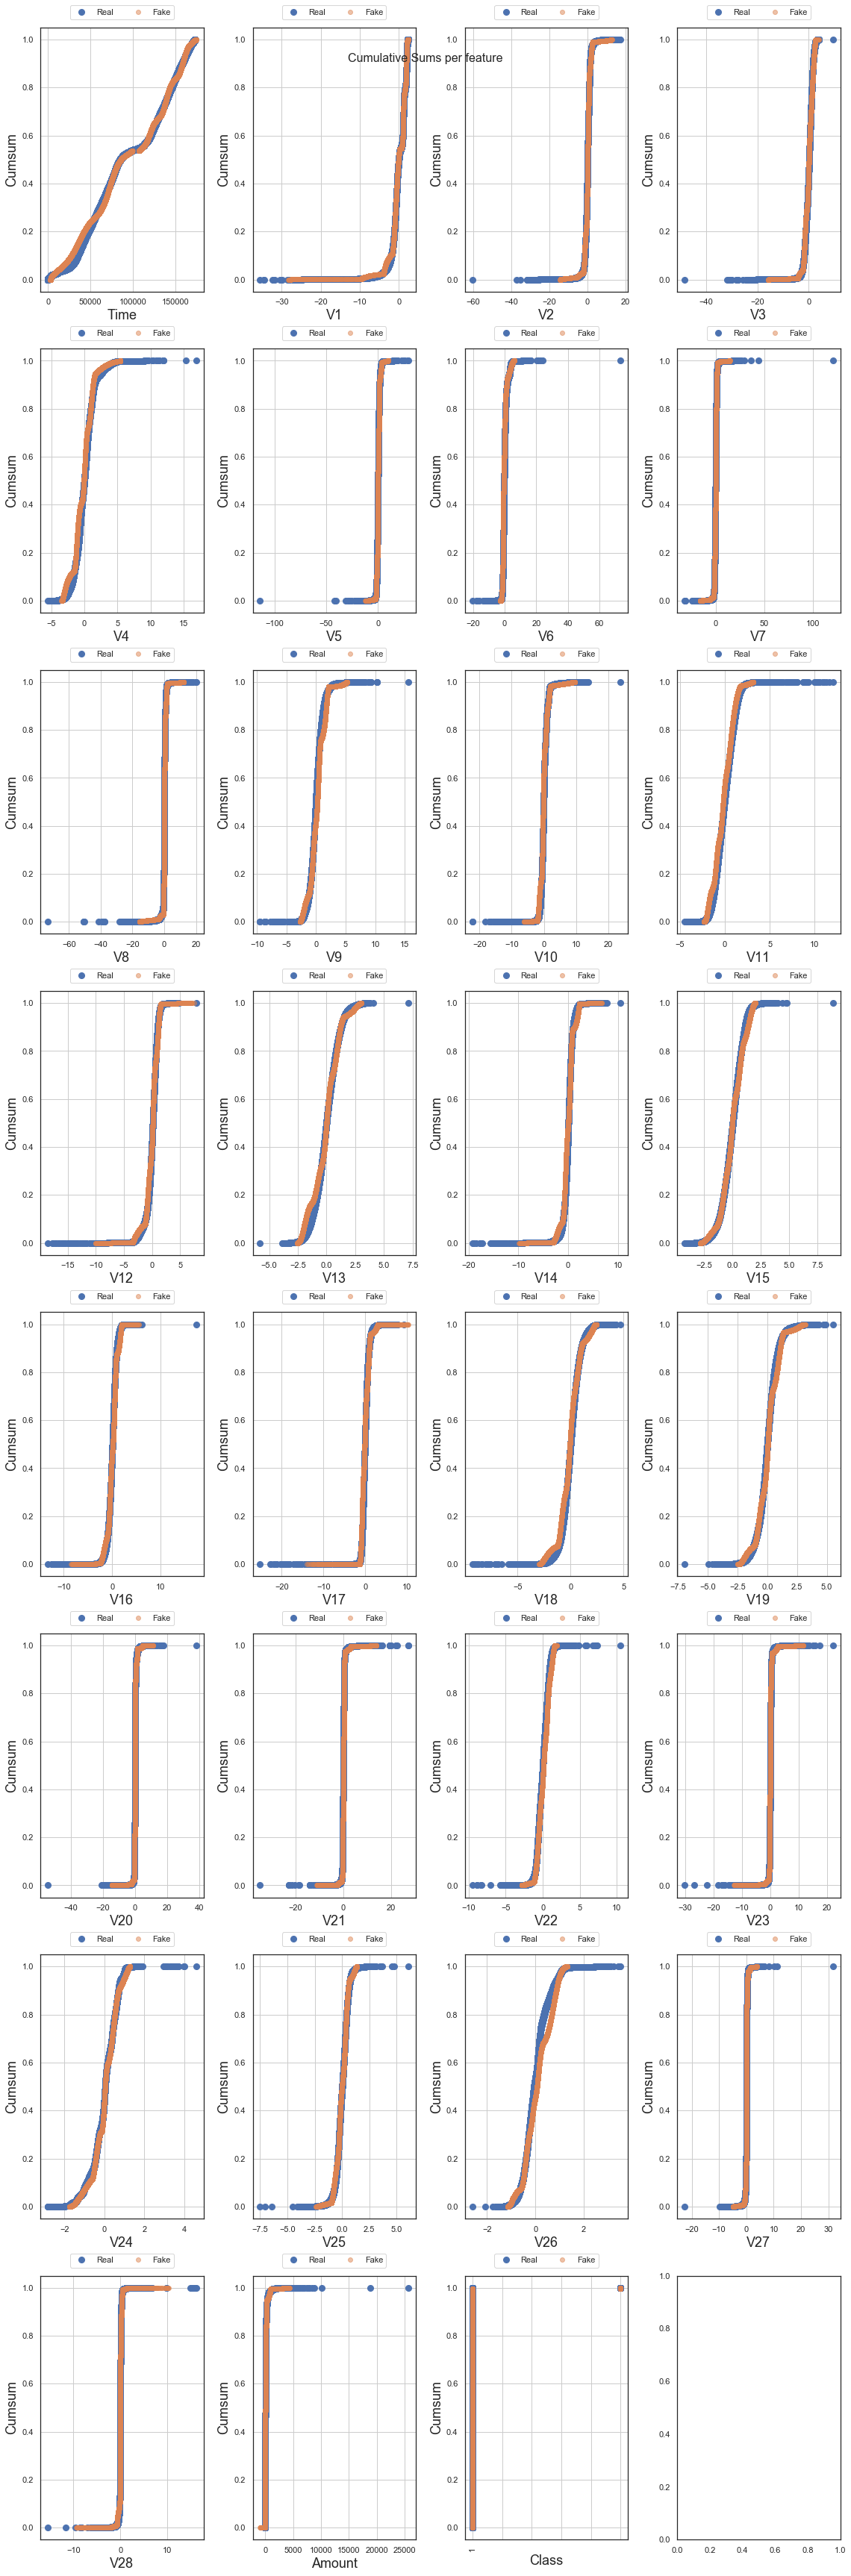

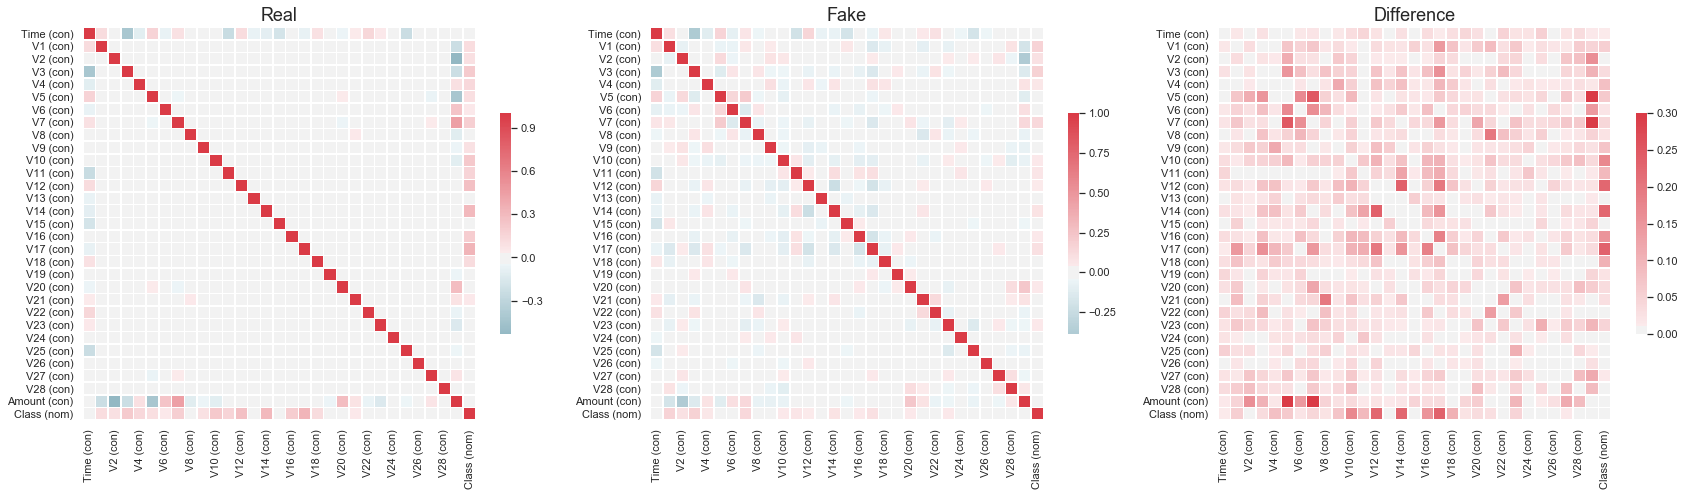

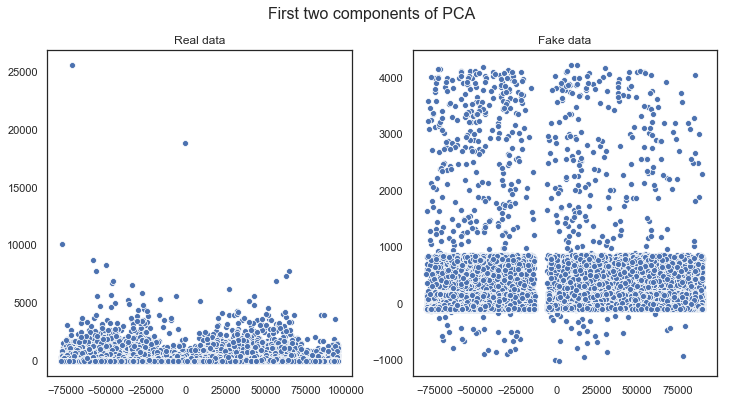

In [63]:
wgan_evaluator.visual_evaluation(annot=False)

## TGAN Skip Connections

In [64]:
real, fake = get_data('../data/creditcard/creditcard_num.csv', '../final_data/creditcard/creditcard_sample_tgan-skip-connections.csv', real_sep=',')
skip_evaluator = DataEvaluator(real, fake)

In [65]:
skip_evaluator.evaluate(target_col='Amount', target_type='regr', verbose=False)


Correlation metric: kendalltau

Results:
Number of duplicate rows is ignored for total score.
                                                 Result
basic statistics                                 0.7703
Correlation column correlations                  0.1225
Mean Correlation between fake and real columns   0.9369
Mean correlation classifier F1                   0.6429
Correlation 5 PCA components                     1.0000
Duplicate data between sets                    289.0000
Total Result                                     0.6945


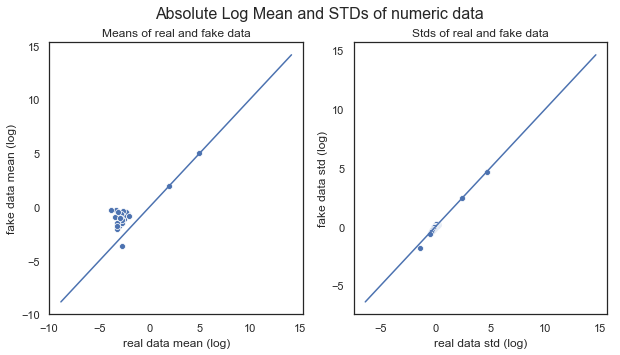

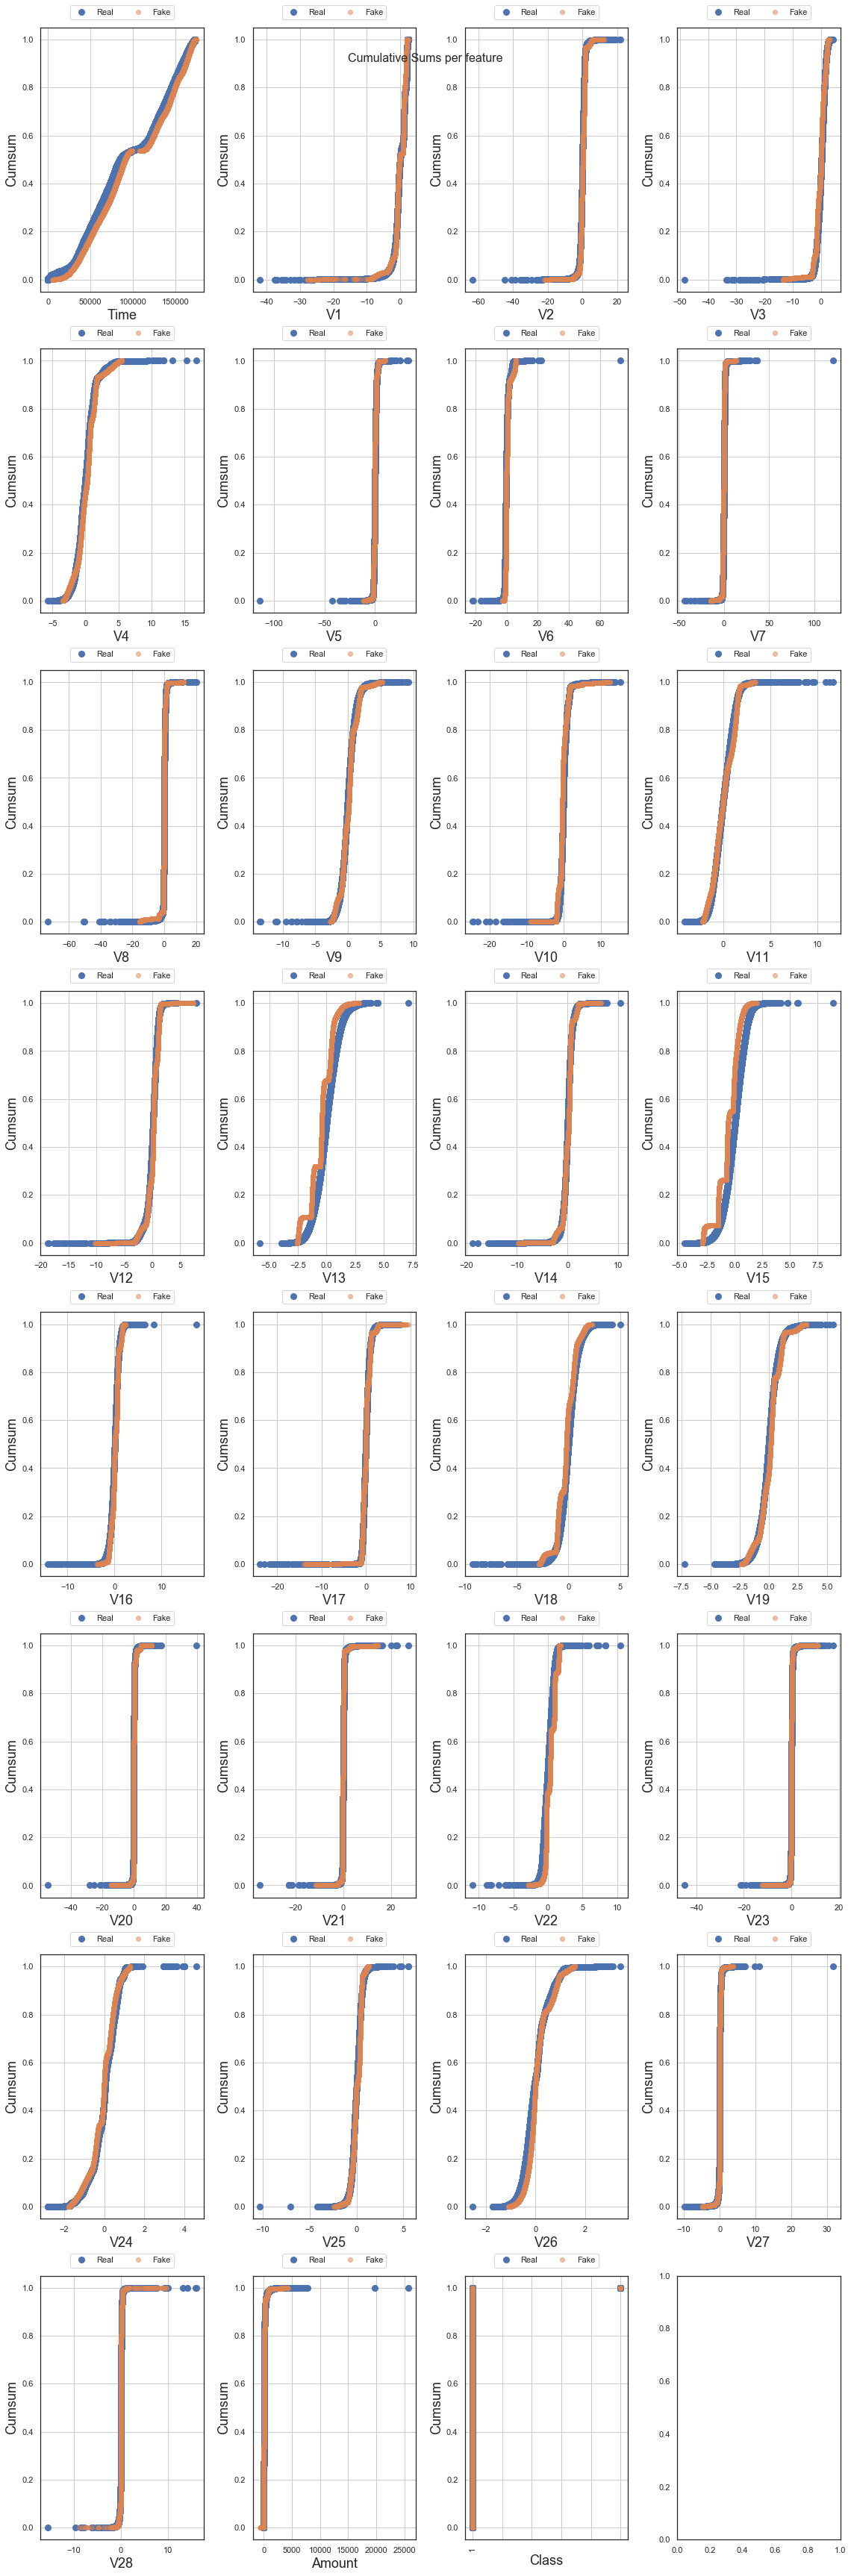

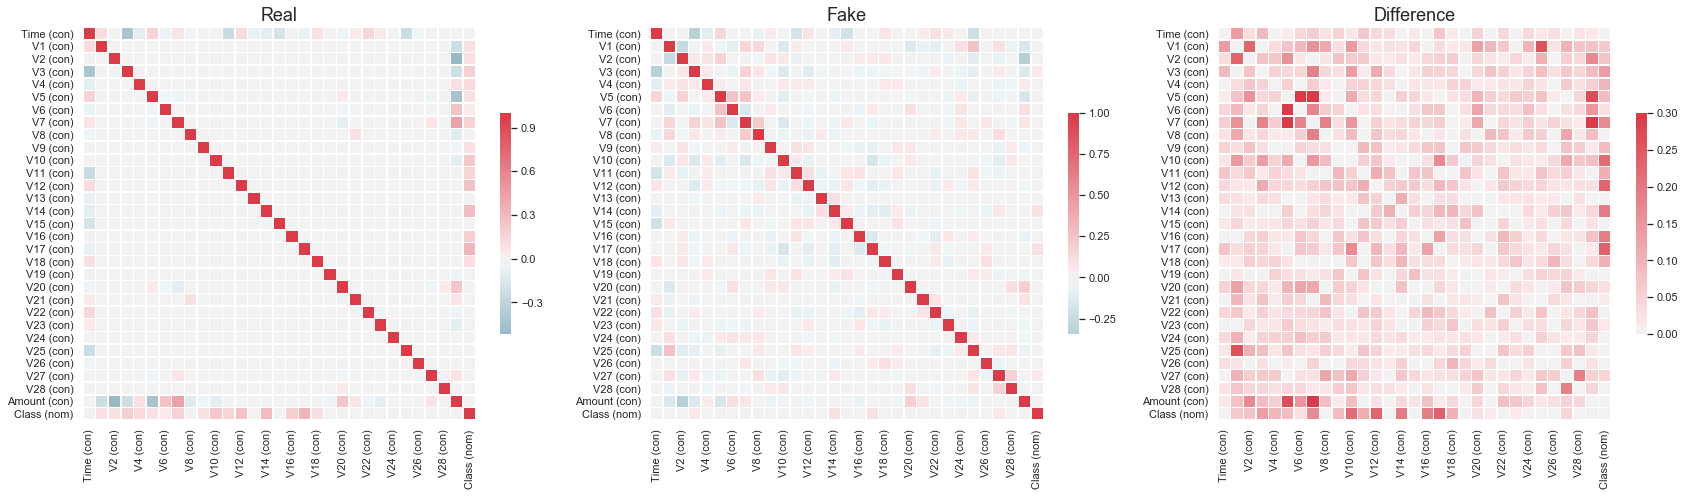

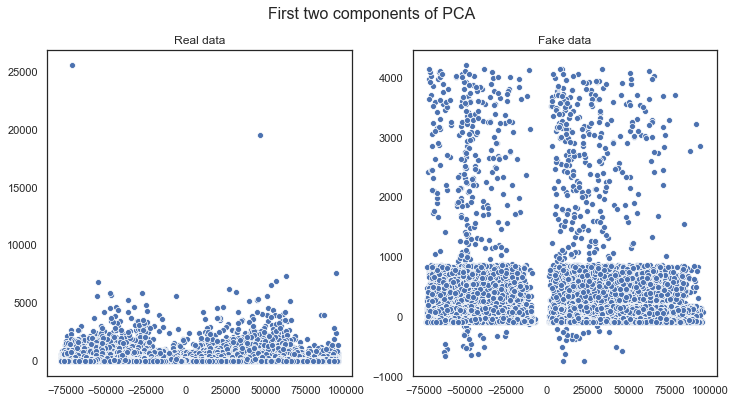

In [66]:
skip_evaluator.visual_evaluation(annot=False)

## MedGAN

In [67]:
real, fake = get_data('../data/creditcard/creditcard_num.csv', '../final_data/creditcard/sample_creditcard_medgan_100.csv', real_sep=',')
medgan_evaluator = DataEvaluator(real, fake)

In [68]:
medgan_evaluator.evaluate(target_col='Amount', target_type='regr', verbose=False)


Correlation metric: kendalltau

Results:
Number of duplicate rows is ignored for total score.
                                                   Result
basic statistics                                  -0.0360
Correlation column correlations                   -0.1113
Mean Correlation between fake and real columns     0.8031
Mean correlation classifier F1                    -0.2857
Correlation 5 PCA components                       1.0000
Duplicate data between sets                    2,969.0000
Total Result                                       0.2740


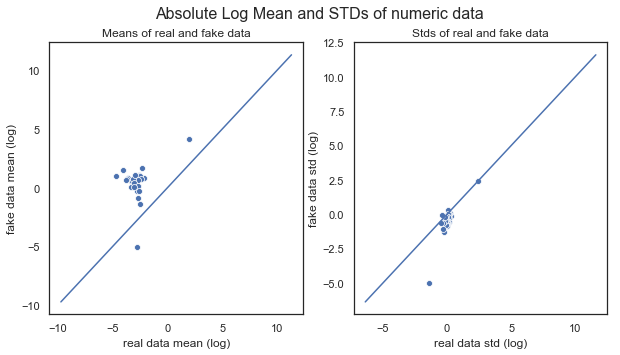

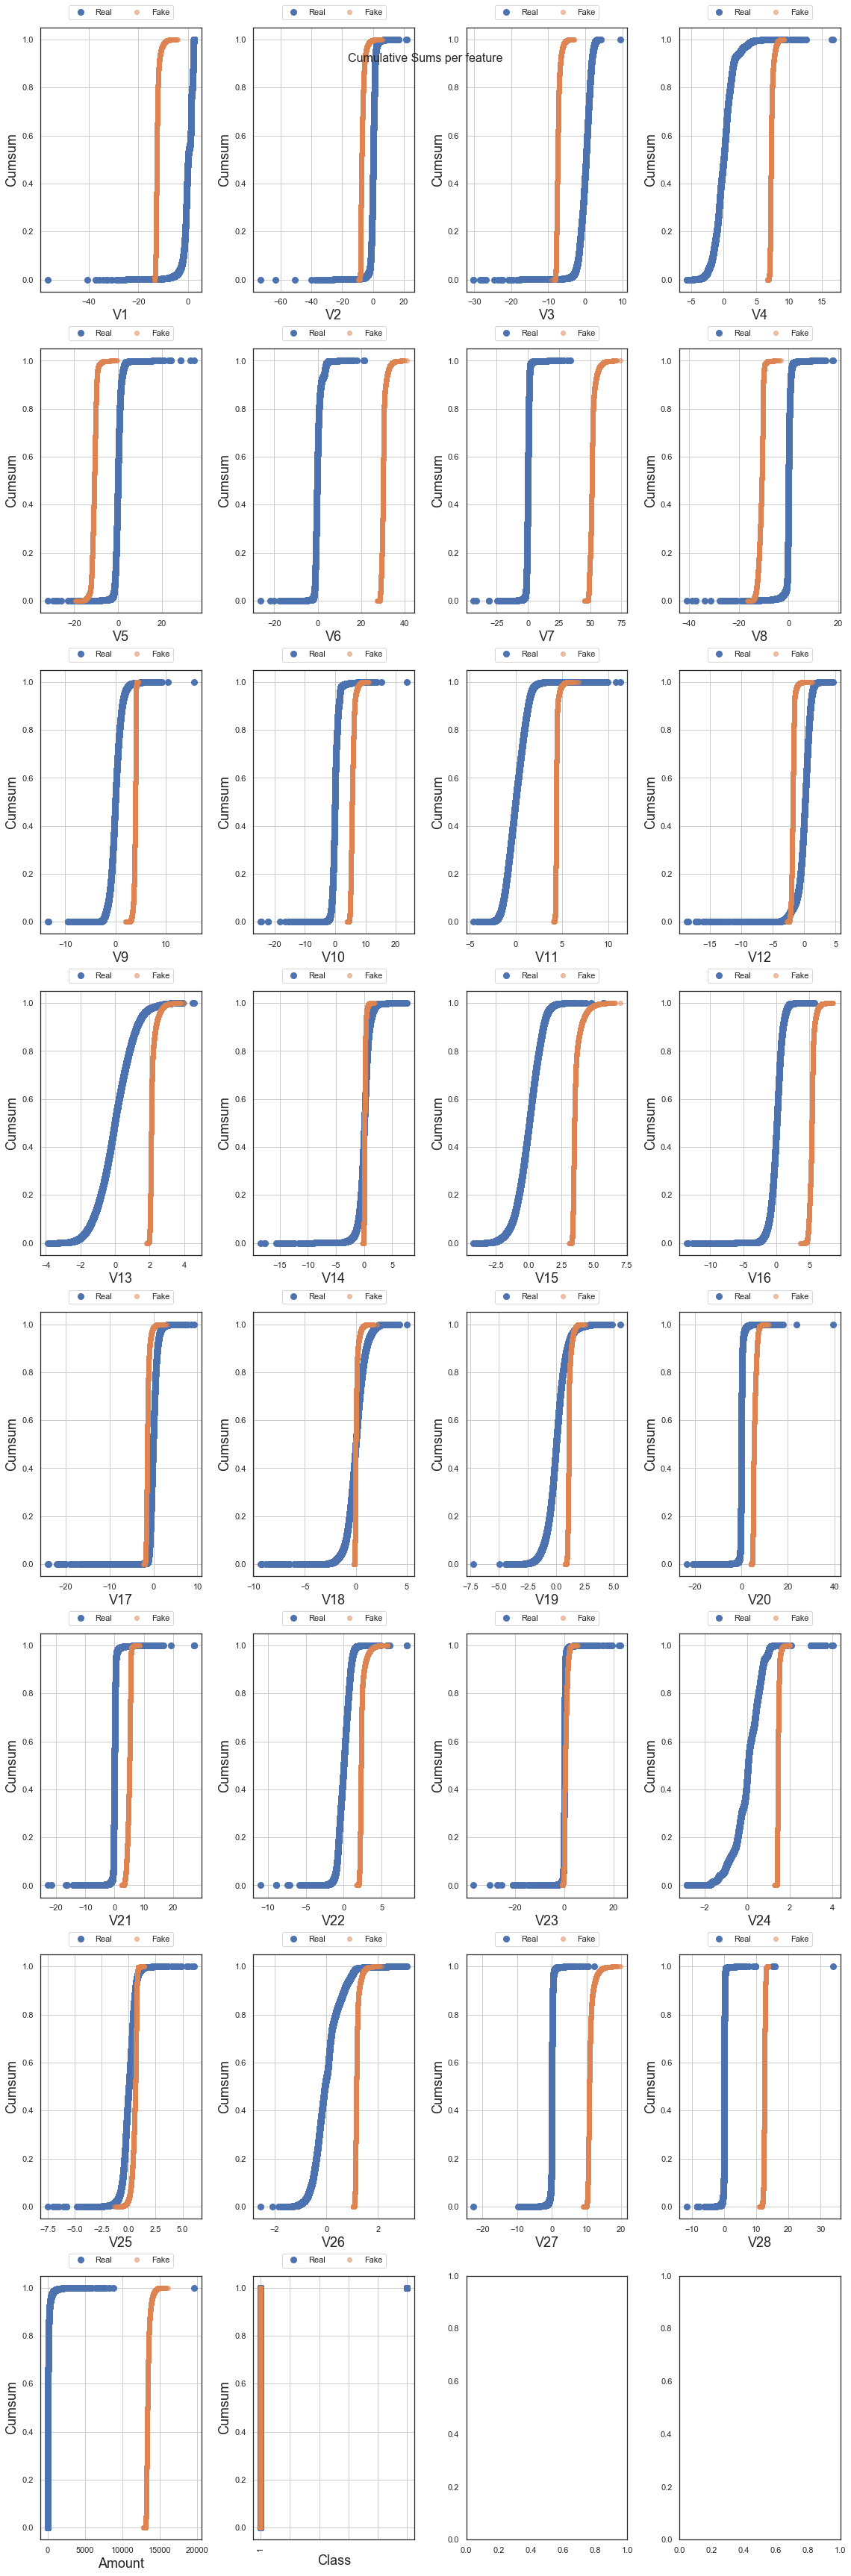

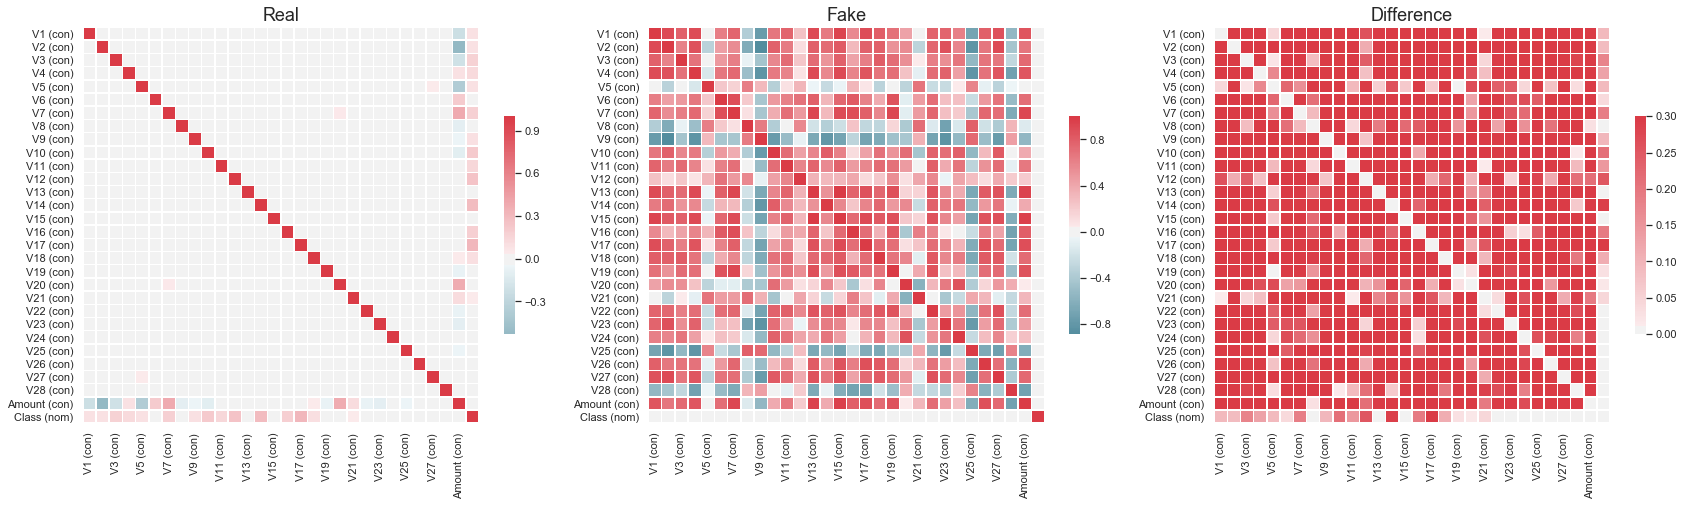

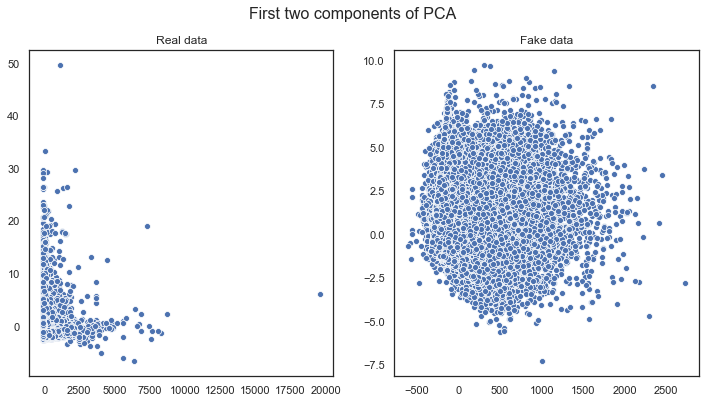

In [69]:
medgan_evaluator.visual_evaluation(annot=False)

## TableGAN

In [70]:
real, fake = get_data('../data/creditcard/creditcard_num.csv', '../final_data/creditcard/sample_creditcard_tablegan_100.csv', real_sep=',')
tablegan_evaluator = DataEvaluator(real, fake)

In [71]:
tablegan_evaluator.evaluate(target_col='Amount', target_type='regr', verbose=False)


Correlation metric: kendalltau

Results:
Number of duplicate rows is ignored for total score.
                                                   Result
basic statistics                                   0.7778
Correlation column correlations                    0.0129
Mean Correlation between fake and real columns     0.9527
Mean correlation classifier F1                     0.8571
Correlation 5 PCA components                       1.0000
Duplicate data between sets                    2,907.0000
Total Result                                       0.7201


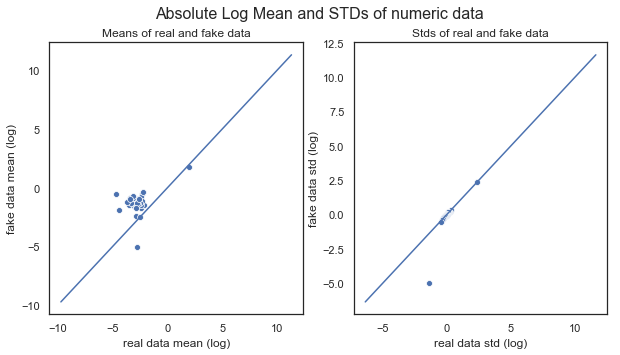

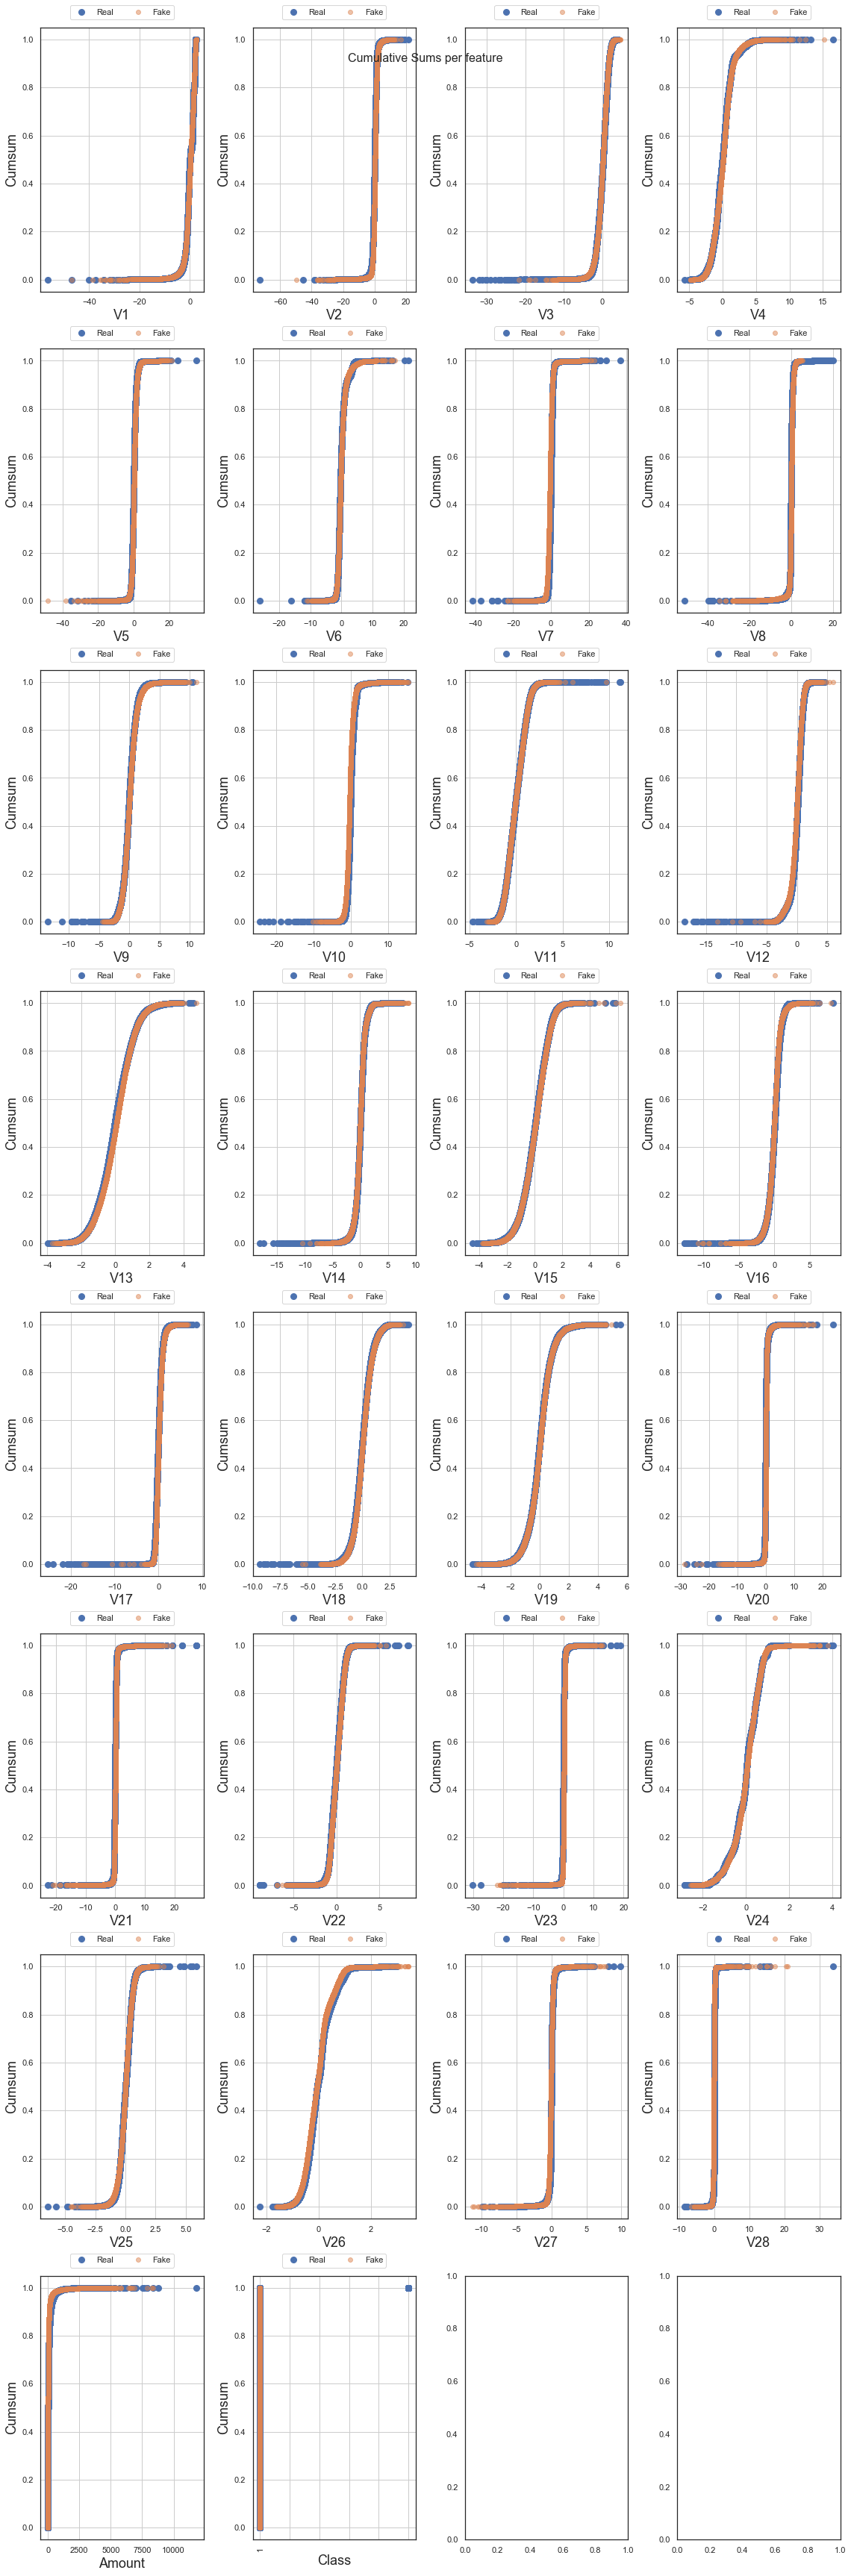

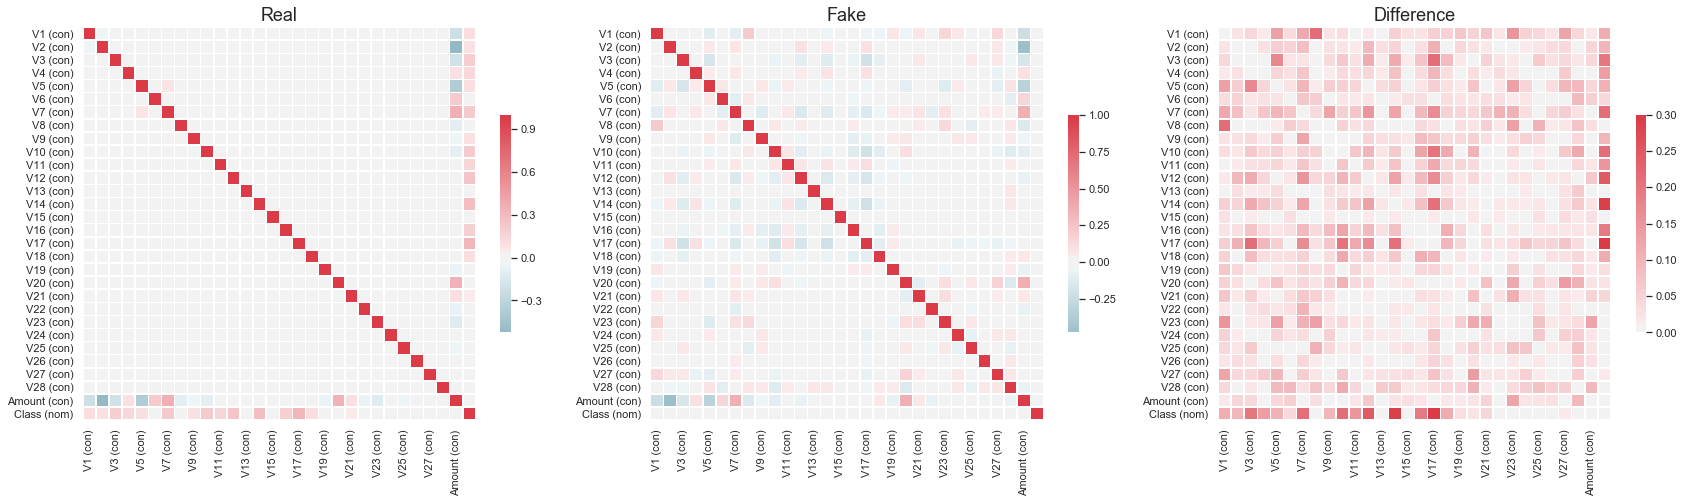

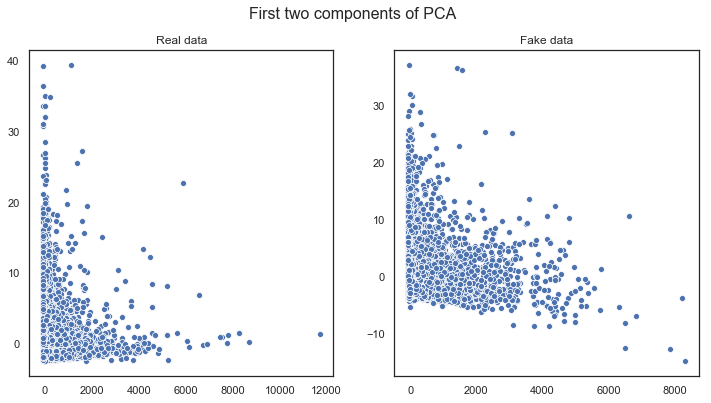

In [72]:
tablegan_evaluator.visual_evaluation(annot=False)

## Feature Importance

In [24]:
target_col = 'trans_type'
x = numerical_encoding(fake.drop([target_col], axis=1), nominal_columns=tgan_org_evaluator.categorical_columns)

[3.15558081e-03 2.25478515e-03 1.00895154e-02 1.60792182e-03 3.68700434e-03 0.00000000e+00 4.03186594e-05 0.00000000e+00 0.00000000e+00 3.42898353e-05 2.31575622e-04 0.00000000e+00 6.94454588e-04 2.26483782e-02
 1.71159461e-03 2.68261433e-03 5.46665979e-01 2.46056113e-03 4.02035426e-01]
Index(['trans_id', 'account_id', 'trans_amount', 'balance_after_trans',
       'trans_operation_CC_WITHDRAWAL',
       'trans_operation_COLLECTION_FROM_OTHER_BANK',
       'trans_operation_CREDIT_IN_CASH',
       'trans_operation_REMITTANCE_TO_OTHER_BANK', 'trans_operation_UNKNOWN',
       'trans_operation_WITHDRAWAL_IN_CASH', 'trans_k_symbol_HOUSEHOLD',
       'trans_k_symbol_INSURANCE_PAYMENT', 'trans_k_symbol_INTEREST_CREDITED',
       'trans_k_symbol_LOAN_PAYMENT', 'trans_k_symbol_OLD_AGE_PENSION',
       'trans_k_symbol_PAYMENT_FOR_STATEMENT',
       'trans_k_symbol_SANCTION_INTEREST', 'trans_k_symbol_UNKNOWN',
       'trans_date'],
      dtype='object')
[ 5  7  8 11  9  6 10 12  3 14  1 17 15  0  

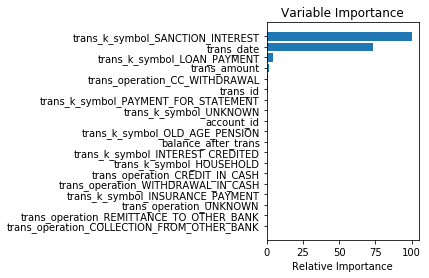

In [26]:
feature_importance = tgan_org_evaluator.f_classifiers[2].feature_importances_
print(feature_importance)
# feature_importance = clf.feature_importances_
# make importances relative to max importance
feature_importance = 100.0 * (feature_importance / feature_importance.max())
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + .5
plt.subplot(1, 2, 2)
plt.barh(pos, feature_importance[sorted_idx], align='center')
column_names = x.columns
print(column_names)
print(sorted_idx)
plt.yticks(pos, column_names[sorted_idx])
plt.xlabel('Relative Importance')
plt.title('Variable Importance')
plt.show()

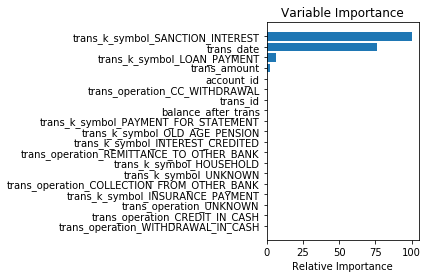

In [27]:
feature_importance = tgan_org_evaluator.r_classifiers[2].feature_importances_
feature_importance = 100.0 * (feature_importance / feature_importance.max())
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + .5
plt.subplot(1, 2, 2)
plt.barh(pos, feature_importance[sorted_idx], align='center')
column_names = x.columns
plt.yticks(pos, column_names[sorted_idx])
plt.xlabel('Relative Importance')
plt.title('Variable Importance')
plt.show()